In [1]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



import warnings
warnings.filterwarnings('ignore')

In [ ]:
#data=pd.read_csv("C:/Users/SRIRAM SRIPADA/Desktop/ASSIGNMENTS/Challenge-20201110T103323Z-001/Challenge/cars_price.csv",index_col=0)
#data.head()

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cars_price.csv to cars_price.csv


In [3]:
data = pd.read_csv('cars_price.csv',index_col=0)
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


In [ ]:
catCols = data.select_dtypes("object").columns 

To know how many categorical variables in each column

In [ ]:
for cat in catCols:
    print(cat + ':' + str(len(data[cat].unique())))

make:93
model:991
condition:3
fuel_type:3
color:13
transmission:2
drive_unit:5
segment:10


# 1. Data Cleaning 

In [ ]:
data.isna().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

First let us fill all the null values in numeric feature - volume(cm3) 

We are going to replace all the null values by median of volume(cm3) of all the cars

In [ ]:
data['volume(cm3)'].fillna((data['volume(cm3)'].median()), inplace=True)

Second let us fill all the categorical null values with their mode(most frequently repeating element value) 

In [ ]:
data['drive_unit'].unique()

array(['front-wheel drive', 'all-wheel drive',
       'part-time four-wheel drive', 'rear drive', nan], dtype=object)

In [ ]:
data['drive_unit'].value_counts()

front-wheel drive             27074
rear drive                     4809
all-wheel drive                4176
part-time four-wheel drive     2596
Name: drive_unit, dtype: int64

Here we are replacing null values in 'Drive_unit' with 'Front wheel drive' as it is most repeated in whole dataset

In [ ]:
data.drive_unit.fillna(value='front-wheel drive',inplace=True)

Here we are replacing null values in 'Segment' with 'D' as it is most repeated in whole dataset

In [ ]:
data['segment'].value_counts()

D    8985
C    7509
J    6161
M    4532
E    4391
B    3128
F     658
S     549
A     332
Name: segment, dtype: int64

In [ ]:
data.segment.fillna(value='D',inplace=True)

After cleaning null values = 0

In [ ]:
data.isnull().sum()

make                   0
model                  0
priceUSD               0
year                   0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
dtype: int64

Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [ ]:
data['Current Year']=2020

In [ ]:
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,Current Year
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,2020
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,2020
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,2020
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,2020
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,2020


So here we are adding a new column 'no of years' to know how old is the car wrt year 2020

In [ ]:
data['no_of_years']=data['Current Year'] - data['year']

In [ ]:
data.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,Current Year,no_of_years
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,2020,27
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,2020,12
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,2020,12
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,2020,15
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,2020,18


#2. Exploratory Data Analysis

Importing required libraries


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

Below graph shows count of Car Segments - Observed that Segment - D is most used car out of all

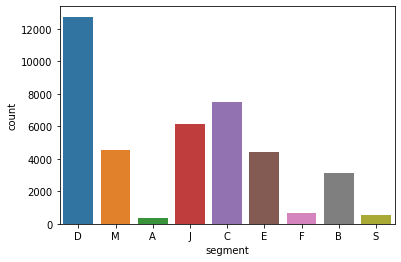

In [ ]:
sns.countplot(data['segment']);

Below graph shows count of Fuel type used - Observed that Petrol is most used

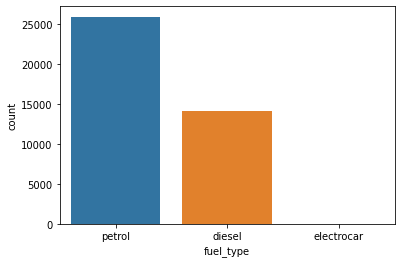

In [ ]:
sns.countplot(data['fuel_type']);

Below graph shows count of Transmission of Cars - Observed that Mechanical gear cars are most widely purchased

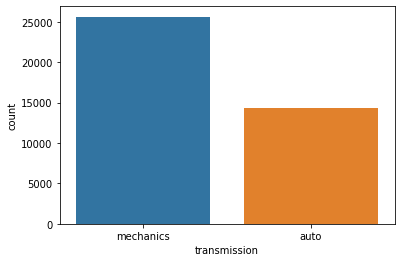

In [ ]:
sns.countplot(data['transmission']);

Below function is used to plot Categorical variable with PriceUSD of Car

In [ ]:
def plot_cat_groupby(variable, size=(7,4)):
    ''' 
    Plot Median priceUSD by data categorical series name 
    '''
    results = data[[variable, 'priceUSD']].groupby(variable).median().reset_index()
    values = list(results['priceUSD'].values)
    labels = list(results[variable].values)

    fig, ax = plt.subplots(figsize=size)
    ind = range(len(results))
    ax.barh(ind, values, align='center', height=0.6, color = '#55a868', alpha=0.8)
    ax.set_yticks(ind)
    ax.set_yticklabels(labels)
    ax.set_xlabel('priceUSD')
    ax.tick_params(left=False, top=False, right=False) 
    ax.set_title('Comparison of {} labels'.format(variable))
    
    plt.tight_layout()
    plt.show();
    

Observed that 'S' Segment Cars are Most expensive Cars out of all , followed by J segment cars

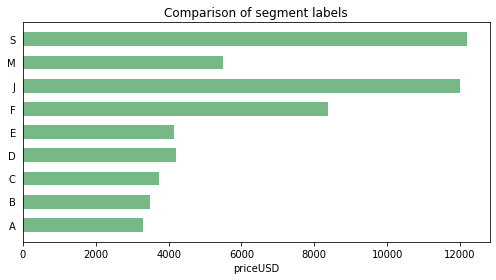

In [ ]:
plot_cat_groupby('segment')

Observed that 'Electric Cars' are most expensive, followed by Diesel Cars and Petrol Cars

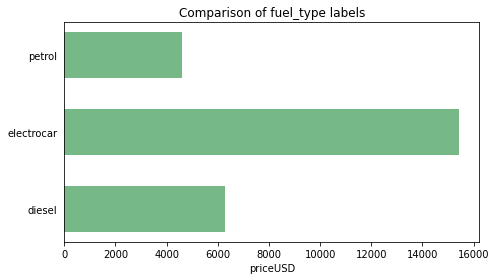

In [ ]:
plot_cat_groupby('fuel_type')

observed that Auto Transmission Cars are highly expensive than Mechanical Trasnmission Cars

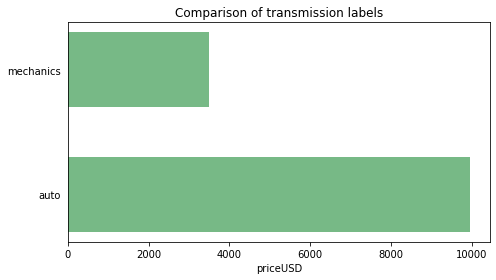

In [ ]:
plot_cat_groupby('transmission')

Observed that Brown Color cars are mostly bought and highly prefered

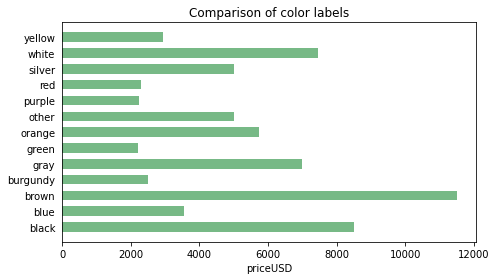

In [ ]:
plot_cat_groupby('color')

Below function used to plot Boxplot between Categorical variable and PriceUSD

In [ ]:
def boxplot_cat_groupby(variable, price_range=(0, 125000), size=(8,4)):
    ''' 
    Boxplot of priceUSD by data categorical variables
    '''
    results = data[[variable, 'priceUSD']].groupby(variable).median().reset_index()

    categories = results[variable].values.tolist()

    hist_data = []
    for cat in categories:
        hist_data.append(data['priceUSD'].loc[data[variable]==cat].values)

    fig, ax = plt.subplots(figsize=size)
    ax.boxplot(hist_data, 0, '', vert=False)
    ax.set_xlim(price_range)
    ax.set_yticklabels(categories)
    ax.set_xlabel('PriceUSD')
    ax.tick_params(left=False, right=False) 
    ax.set_title('Comparison of {} categories'.format(variable))
    plt.tight_layout()
    plt.show();

Electric cars are Highly priced cars out of Diesel and Petrol Cars

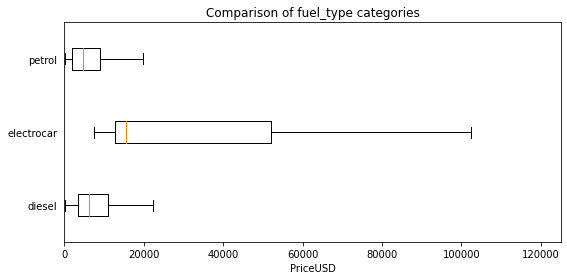

In [ ]:
boxplot_cat_groupby('fuel_type')

Below function to display Pie chart

In [ ]:
def pie_chart(df,variable):
  labels = df[variable].value_counts().index
  values = df[variable].value_counts().values
  fig = px.pie(df, values=values, names=labels, title='Comparison of various {} of cars '.format(variable))
  return fig.show()

Shows the comparision of Various Car Makers 

In [ ]:
pie_chart(data,'make')

Most of the Cars are bought in D segment by their count

In [ ]:
pie_chart(data,'segment')

Most of the Used cars are now around (10-25) yrs old 

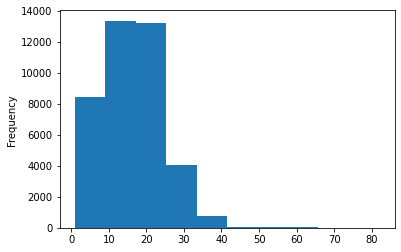

In [ ]:
data['no_of_years'].plot.hist()

As the years are passing by from 1937-2019 the Cars price has been increasing steadily

In [ ]:
fig = px.scatter(x=data['year'], y=data['priceUSD'])
fig.show()

Observed that (0-10)  yr difference used cars have the highest Price in (usd)

In [ ]:
fig = px.scatter(x=data['no_of_years'], y=data['priceUSD'])
fig.show()

In [ ]:
import seaborn as sns

Skewness: 5.011810
Kurtosis: 53.877239


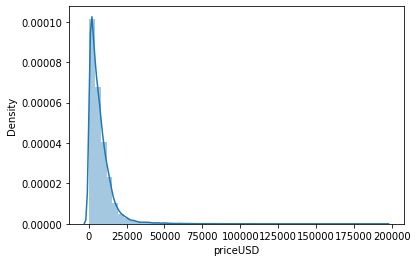

In [ ]:
sns.distplot(data['priceUSD'])
#skewness and kurtosis
print("Skewness: %f" % data['priceUSD'].skew())
print("Kurtosis: %f" % data['priceUSD'].kurt())

"""
We can observe that the distribution of prices shows a high positive skewness 
to the left (skew > 1). A kurtosis value of 53 is extremely high, meaning that
there is a profusion of outliers in the dataset. We need to do something.
"""

Removal of outliers in the priceUSD column by Using Inter-Quartile Ranges

In [ ]:
Q1 = data['priceUSD'].quantile(0.10)
Q2 = data['priceUSD'].quantile(0.85)
IQR = Q2 - Q1
LL = Q1-IQR*1.5
UL = Q2+IQR*1.5

data = data.loc[(data['priceUSD']>LL) & (data['priceUSD']<UL)]
data

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,Current Year,no_of_years
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D,2020,27
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M,2020,12
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D,2020,12
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A,2020,15
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D,2020,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J,2020,12
39996,peugeot,607,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E,2020,19
39997,mercedes-benz,c-klass,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D,2020,21
39998,proton,persona,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,D,2020,24


After removal of Extreme Outliers from Priceusd column we can observe that 'Kurtosis' value is reduced to 1.82 which is a good value

Skewness: 1.340699
Kurtosis: 1.828452


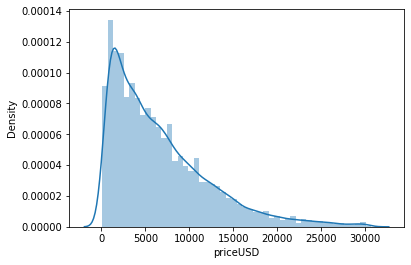

In [ ]:
sns.distplot(data['priceUSD'])
#skewness and kurtosis
print("Skewness: %f" % data['priceUSD'].skew())
print("Kurtosis: %f" % data['priceUSD'].kurt())

As we can observe extreme data values (High kurtosis) values in both Mileage(km) and volume(cm3) - we can convert both the features into log scale

Skewness: 17.557177
Kurtosis: 443.906407


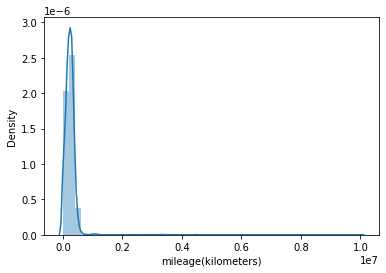

In [ ]:
sns.distplot(data['mileage(kilometers)'])
#skewness and kurtosis
print("Skewness: %f" % data['mileage(kilometers)'].skew())
print("Kurtosis: %f" % data['mileage(kilometers)'].kurt())

After converting milieage(km) to log scale we can reduce the kurtosis value their by reducing the outlier effect on the data

Skewness: -3.752285
Kurtosis: 16.226835


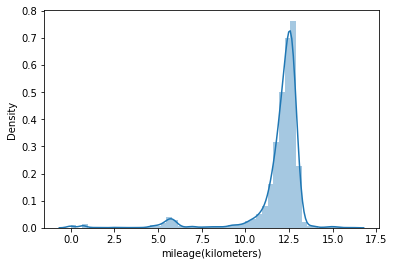

In [ ]:
data['mileage(kilometers)'] = np.log1p(data['mileage(kilometers)'])
sns.distplot(data['mileage(kilometers)'])
#skewness and kurtosis
print("Skewness: %f" % data['mileage(kilometers)'].skew())
print("Kurtosis: %f" % data['mileage(kilometers)'].kurt())

Skewness: 8.466907
Kurtosis: 137.717332


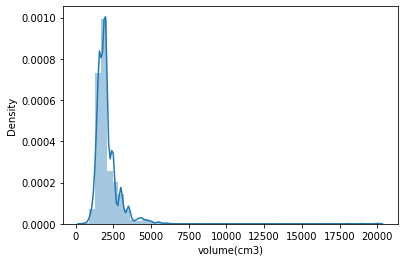

In [ ]:
sns.distplot(data['volume(cm3)'])
#skewness and kurtosis
print("Skewness: %f" % data['volume(cm3)'].skew())
print("Kurtosis: %f" % data['volume(cm3)'].kurt())

Skewness: 1.189839
Kurtosis: 4.846228


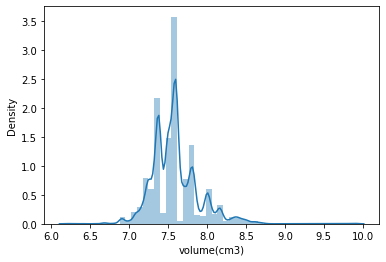

In [ ]:
data['volume(cm3)'] = np.log1p(data['volume(cm3)'])
sns.distplot(data['volume(cm3)'])
#skewness and kurtosis
print("Skewness: %f" % data['volume(cm3)'].skew())
print("Kurtosis: %f" % data['volume(cm3)'].kurt())


#Label Encoding for all Nominal Features

In [ ]:
data['color'].value_counts()

black       8554
silver      7104
blue        5644
gray        4087
white       3648
green       2775
other       2345
red         1963
burgundy    1451
brown        919
purple       433
yellow       215
orange       162
Name: color, dtype: int64

All the operations performed Above are performed in the below preprocessing function 

In [4]:
def preprocessing_cols(df):
    #creating a copy of dataset in df1 
    df1 = data.copy()
    df1 = df1.drop(['make'],axis=1)
    #model feature is dropped as it contains around 1000 categorical variables and it is unwanted to determine Price of car 
    df1 = df1.drop(['model'],axis=1)

    

    # filling the null values
    #filling the null value of  volume(cm3) with median of volume
    df1['volume(cm3)'].fillna((df1['volume(cm3)'].median()), inplace=True)
    #filling the null value of  drive unit with mode of drive unit (27000) values (observed that front wheel drive is most repeated)
    df1.drive_unit.fillna(value='front-wheel drive',inplace=True)
    #filling the null value of segment with mode of segment (observed that D Segmnet is most repeated) 
    df1.segment.fillna(value='D',inplace=True)

    # let's obtain the counts for each one of the labels in variable 'make'
    # let's capture this in a dictionary that we can use to re-map the labels
    #df_frequency_map = df1.make.value_counts().to_dict()                       
    #df1['make'] = df1.make.map(df_frequency_map)

    #creating new column - 2020 and subtracting the year from it to know how many yrs taken when the car was 1st bought
    df1['Current Year'] = 2020
    df1['no_of_years']=df1['Current Year'] - df1['year']

    df1 = df1.drop(['year'],axis=1)
    df1 = df1.drop(['Current Year'],axis=1)

    df1.rename(columns = {'mileage(kilometers)':'mileage_km', 'volume(cm3)':'volume_cm3'}, inplace = True)

    df1['mileage_km'] = np.log1p(df1['mileage_km'])
    df1['volume_cm3'] = np.log1p(df1['volume_cm3'])


    #giving counts according to the count of colours (Count Encoding) 
    df1['color'] = df1['color'].map({'black':12,'silver':11,'blue':10,'gray':9,'white':8,'green':7,'other':6,'red':5,'burgundy':4,'brown':3,'purple':2,'yellow':1,'orange':0})
    #Here considering 'condition','fuel type','transmission','segment','drive unit' as ORDINAL CATEGORICAL VARIABLES , PERFORMED ORDINAL ENCODING
    #Here the  all the features(color,condition,fuel type,transmission,segment,drive unit) are considered ORDINAL
    df1["condition"] = df1["condition"].map({ 'with mileage':2,'for parts' :1,'with damage': 0})
    df1['fuel_type'] = df1['fuel_type'].map({ 'electrocar':0, 'petrol':1, 'diesel':2 })
    df1['transmission'] = df1['transmission'].map({ 'mechanics' : 0,'auto' : 1 })
    df1['segment'] = df1['segment'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'J':7,'M':8,'S':9})
    df1['drive_unit'] = df1['drive_unit'].map({'front-wheel drive':0,'all-wheel drive':1,'rear drive':2,'part-time four-wheel drive':3})

    return df1

In [5]:
data1 = preprocessing_cols(data)
data1

,priceUSD,condition,mileage_km,fuel_type,volume_cm3,color,transmission,drive_unit,segment,no_of_years
0,565,2,13.774705,1,7.601402,12,0,0,4,27
1,5550,2,12.055256,2,7.244942,11,0,0,8,12
2,8300,2,12.314932,1,7.824446,2,1,0,4,12
3,3300,2,11.849405,1,7.090910,10,0,0,1,15
4,2450,0,12.931205,2,7.696667,4,0,0,4,18
...,...,...,...,...,...,...,...,...,...,...
39995,12500,2,12.273736,1,8.216358,11,1,1,7,12
39996,4754,2,12.594734,1,7.696667,10,0,0,5,19
39997,4000,2,0.000000,2,7.696667,6,0,2,4,21
39998,1200,2,12.429220,1,7.170888,6,0,0,4,24


function to remove outliers

In [6]:
def outlier(df):

  Q1 = df['priceUSD'].quantile(0.10)
  Q2 = df['priceUSD'].quantile(0.85)
  IQR = Q2 - Q1
  LL = Q1-IQR*1.5
  UL = Q2+IQR*1.5

  df  =  df.loc[(df['priceUSD']>LL) & (df['priceUSD']<UL)]
  df2 = df.copy()

  #Q1 = df2['mileage(kilometers)'].quantile(0.0)
  #Q2 = df2['mileage(kilometers)'].quantile(0.70)
  #IQR = Q2 - Q1
  #LL = Q1-IQR*1.5
  #UL = Q2+IQR*1.5

  #df2 = df2.loc[(data['mileage(kilometers)']>LL) & (df2['mileage(kilometers)']<UL)]

  return df2

In [8]:
data2 = outlier(data1)
data2

,priceUSD,condition,mileage_km,fuel_type,volume_cm3,color,transmission,drive_unit,segment,no_of_years
0,565,2,13.774705,1,7.601402,12,0,0,4,27
1,5550,2,12.055256,2,7.244942,11,0,0,8,12
2,8300,2,12.314932,1,7.824446,2,1,0,4,12
3,3300,2,11.849405,1,7.090910,10,0,0,1,15
4,2450,0,12.931205,2,7.696667,4,0,0,4,18
...,...,...,...,...,...,...,...,...,...,...
39995,12500,2,12.273736,1,8.216358,11,1,1,7,12
39996,4754,2,12.594734,1,7.696667,10,0,0,5,19
39997,4000,2,0.000000,2,7.696667,6,0,2,4,21
39998,1200,2,12.429220,1,7.170888,6,0,0,4,24


In [9]:
X = data2.drop(['priceUSD'],axis = 'columns', inplace = False)
y = np.log1p(data2['priceUSD'])

In [10]:
#Setup train and validation cross validation datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size  = 0.2,random_state=42)

In [11]:
# random forest  regresiion
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model_rf = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
from sklearn import metrics

y_pred_normal = np.expm1(y_pred)
y_test_normal = np.expm1(y_test)

print('R2_SCORE', r2_score(y_test_normal,y_pred_normal))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_normal,y_pred_normal)))

R2_SCORE 0.8753263827336694
RMSE: 1991.5565838337002


In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
regressor=RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [15]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [16]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [17]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [18]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [19]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  23.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [20]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1100}

In [21]:
rf_random.best_score_

-0.1306652635733889

In [22]:
predictions=rf_random.predict(X_test)

In [23]:
predictions_normal = np.expm1(predictions)
y_test1_normal = np.expm1(y_test)

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1_normal, predictions_normal)))
print(r2_score(y_test1_normal,predictions_normal))

RMSE: 1984.5771529693295
0.8761986915326498


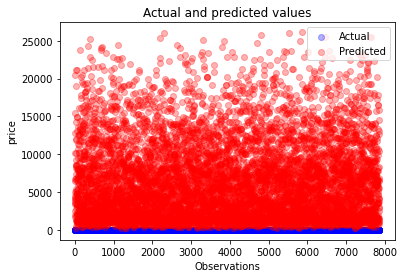

In [25]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, predictions_normal.size), y=predictions_normal, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('price')
plt.legend()
plt.show()

In [26]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

reg_gb = GradientBoostingRegressor(random_state=0)
model = reg_gb.fit(X_train, y_train)

In [28]:
y_pred2 = reg_gb.predict(X_test)

In [29]:
y_pred2_normal = np.expm1(y_pred2)
y_test2_normal = np.expm1(y_test)

In [30]:
from sklearn import metrics
print('r2_score:',r2_score(y_test2_normal,y_pred2_normal))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2_normal,y_pred2_normal)))

r2_score: 0.859110238863239
RMSE: 2117.1181059800883


In [31]:
df = pd.DataFrame({'Actual': y_test2_normal, 'Predicted':y_pred2_normal})
df

,Actual,Predicted
24357,13990.0,13694.463575
1466,2600.0,2184.620016
12221,1150.0,1931.654540
5468,1700.0,1681.745725
24967,2800.0,3723.764844
...,...,...
6346,6700.0,6639.301414
28964,13999.0,14198.024503
20809,2500.0,2448.988381
10512,500.0,1335.475138


In [32]:
#HyperParameterTuning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

learning_rate=[0.15,0.1,0.05,0.01,0.005,0.001]

loss=['ls', 'lad', 'huber', 'quantile']

# create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate' : learning_rate,
               'loss' : loss }


# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
gb_random = RandomizedSearchCV(estimator = reg_gb, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


gb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1, total=  31.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1, total=  32.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1, total=  32.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1, total=  32.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=10, max_features=sqrt, max_depth=15, loss=lad, learning_rate=0.1, total=  33.3s
[CV] n_estimators=900, min_samples_split=5, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 50.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [42]:
prediction_gb = gb_random.predict(X_test)

In [43]:
y_pred3_normal = np.expm1(prediction_gb)

In [48]:
print('r2_score :',r2_score(y_test2_normal,y_pred3_normal))

r2_score : 0.8832080787266724


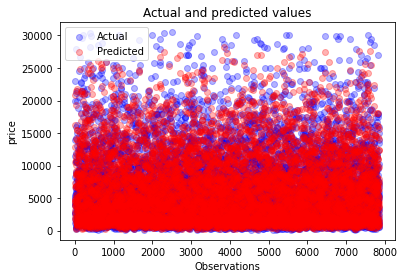

In [50]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test2_normal.size), y=y_test2_normal, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred3_normal.size), y=y_pred3_normal, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('price')
plt.legend()
plt.show()